In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

3.1 Warming Up Exercises - Basic Inspection and Exploration:

Problem 1 - Data Read, Write and Inspect:

1. Load the provided dataset and import in pandas DataFrame


In [5]:
bank = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/bank.csv")
print("Loaded bank.csv first 5 rows:")
display(bank.head())

Loaded bank.csv first 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


2. Check info of the DataFrame and identify following:

(a) columns with dtypes=object

(b) unique values of those columns.

(c) check for the total number of null values in each column.


In [8]:
print("\nDataFrame info:")
bank.info()

object_cols = bank.select_dtypes(include=['object']).columns.tolist()
print("\nColumns with dtype 'object':", object_cols)


for col in object_cols:
    uniques = bank[col].unique()
    print(f"\nUnique values in: " + col)
    print(uniques[:20])


print("\nNull values per column:")
print(bank.isnull().sum())




DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Columns with dtype 'object': ['job', 'marital', 'education', 'default', 'housing'

3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [11]:
bank_numeric = bank.select_dtypes(exclude=['object']).copy()
print("\nNumeric-only DataFrame:")
display(bank_numeric.head())

bank_numeric.to_csv("banknumericdata.csv", index=False)
print("\nSaved numeric-only DataFrame to banknumericdata.csv")


Numeric-only DataFrame:


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0



Saved numeric-only DataFrame to banknumericdata.csv


4. Read ”banknumericdata.csv” and Find the summary statistics.


In [12]:
bn = pd.read_csv("banknumericdata.csv")
print("\nSummary statistics of banknumericdata.csv:")
display(bn.describe())


Summary statistics of banknumericdata.csv:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:

1. Load the provided dataset and import in pandas DataFrame.

In [17]:
med = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/medical_students_dataset.csv")
print("Loaded medical_student.csv first 5 rows:")
display(med.head())

Loaded medical_student.csv first 5 rows:


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


2. Check info of the DataFrame and identify column with missing (null) values.

In [19]:
print("\nDataFrame info:")
med.info()

null_counts = med.isnull().sum()
print("\nNull counts per column:")
print(null_counts[null_counts > 0])


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Null counts per column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight  

3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [23]:
med_filled = med.copy()

for col in med.columns:
    if med[col].isnull().sum() == 0:
        continue

    if med[col].dtype in [np.float64, np.int64]:
        # numerics: fill with mean
        mean_val = med[col].mean()
        med_filled[col] = med[col].fillna(mean_val)
        print(f"Filled numeric column '{col}' with mean: {mean_val}")
    else:
        # categorical or object: fill with mode. If no mode, fill with 'Unknown'
        modes = med[col].mode()
        if len(modes) > 0:
            mode_val = modes[0]
        else:
            mode_val = "Unknown"
        med_filled[col] = med[col].fillna(mode_val)
        print(f"Filled categorical column '{col}' with mode: {mode_val}")

Filled numeric column 'Student ID' with mean: 49974.042077777776
Filled numeric column 'Age' with mean: 26.02156111111111
Filled categorical column 'Gender' with mode: Male
Filled numeric column 'Height' with mean: 174.9471026685741
Filled numeric column 'Weight' with mean: 69.97158509186075
Filled categorical column 'Blood Type' with mode: B
Filled numeric column 'BMI' with mean: 23.338869359639226
Filled numeric column 'Temperature' with mean: 98.60094787707668
Filled numeric column 'Heart Rate' with mean: 79.50376666666666
Filled numeric column 'Blood Pressure' with mean: 114.55803333333333
Filled numeric column 'Cholesterol' with mean: 184.4863611111111
Filled categorical column 'Diabetes' with mode: No
Filled categorical column 'Smoking' with mode: No


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}


In [25]:
dup_count = med_filled.duplicated().sum()
print("\nNumber of duplicate rows:", dup_count)
if dup_count > 0:
    med_filled = med_filled.drop_duplicates()
    print("Dropped duplicate rows. New shape:", med_filled.shape)
else:
    print("No duplicates to drop.")

# Show cleaned DataFrame head and final null counts
print("\nCleaned DataFrame head:")
display(med_filled.head())
print("\nRemaining null counts:")
print(med_filled.isnull().sum())


Number of duplicate rows: 0
No duplicates to drop.

Cleaned DataFrame head:


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.000000,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,No
1,2.000000,26.021561,Male,152.069157,47.630941,B,23.338869,98.714977,93.0,104.000000,163.0,No,No
2,3.000000,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,49974.042078,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,5.000000,23.000000,Female,174.947103,46.234173,O,23.338869,98.480008,95.0,114.558033,231.0,No,No



Remaining null counts:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

Problem - 1:

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?


In [31]:
titanic = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")
print("All columns in titanic:", titanic.columns.tolist())

cols = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
t_sub = titanic[cols].copy()

t_first = t_sub[t_sub['Pclass'] == 1].copy()
print(f"\nNumber of first-class passengers: {t_first.shape[0]}")
display(t_first.head())

fare_mean = t_first['Fare'].mean()
fare_median = t_first['Fare'].median()
fare_max = t_first['Fare'].max()
fare_min = t_first['Fare'].min()

print("\nFare statistics for Pclass == 1:")
print(f"Mean Fare   : {fare_mean}")
print(f"Median Fare : {fare_median}")
print(f"Max Fare    : {fare_max}")
print(f"Min Fare    : {fare_min}")


All columns in titanic: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Number of first-class passengers: 216


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1



Fare statistics for Pclass == 1:
Mean Fare   : 84.1546875
Median Fare : 60.287499999999994
Max Fare    : 512.3292
Min Fare    : 0.0


Problem - 2:

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.


In [35]:
titanic = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")
t_sub = titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()
t_first = t_sub[t_sub['Pclass'] == 1].copy()

age_nulls = t_first['Age'].isnull().sum()
print("Number of null values in 'Age':", age_nulls)

t_first_no_age_nulls = t_first.dropna(subset=['Age']).copy()
print("After dropping Age nulls:")
display(t_first_no_age_nulls.head())

Number of null values in 'Age': 30
After dropping Age nulls:


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:
• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton

Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [45]:
titanic = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")
print("Original 'Embarked' values:", titanic['Embarked'].unique())

embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked', dummy_na=False)
titanic_with_emb = pd.concat([titanic, embarked_dummies], axis=1)

titanic_with_emb = titanic_with_emb.drop(columns=['Embarked'])

print("\nColumns after one-hot encoding:")
print([c for c in titanic_with_emb.columns if c.startswith('Embarked_')])
display(titanic_with_emb.head())

Original 'Embarked' values: ['S' 'C' 'Q' nan]

Columns after one-hot encoding:
['Embarked_C', 'Embarked_Q', 'Embarked_S']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem - 4:
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visualization to show how the survival distributions vary by gender.

Mean survival rate by Sex:
      Sex  Survived
0  female  0.742038
1    male  0.188908


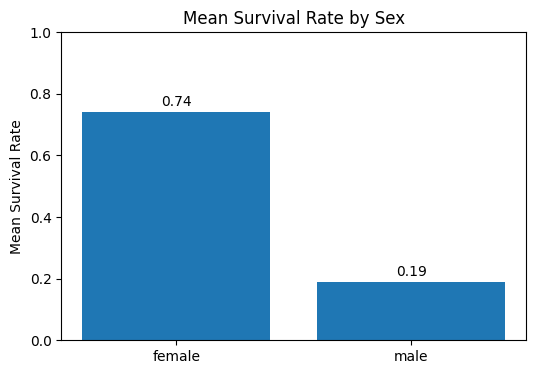

In [44]:
titanic = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")

survival_by_sex = titanic.groupby('Sex')['Survived'].mean().reset_index()
print("Mean survival rate by Sex:")
print(survival_by_sex)

plt.figure(figsize=(6,4))
plt.bar(survival_by_sex['Sex'], survival_by_sex['Survived'])
plt.ylabel('Mean Survival Rate')
plt.title('Mean Survival Rate by Sex')
plt.ylim(0,1)
for i, val in enumerate(survival_by_sex['Survived']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center')
plt.show()

Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Embarked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

Mean survival rate by Embarked and Sex:


Sex,female,male
Embarked,,
C,0.876712,0.305263
Q,0.750000,0.073171
S,0.689655,0.174603


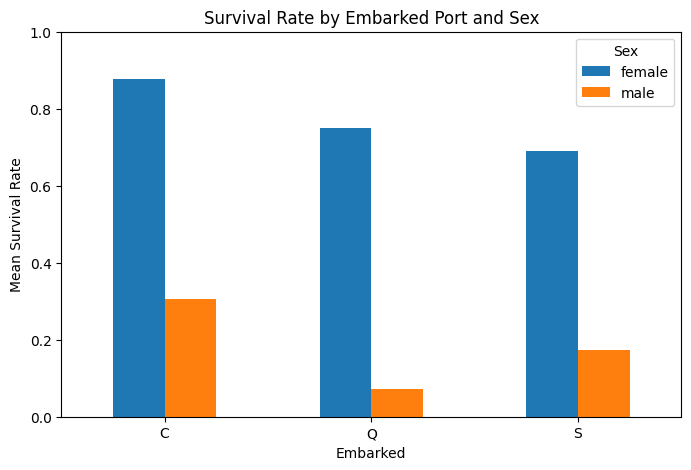

In [46]:
titanic = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")

grouped = titanic.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()
print("Mean survival rate by Embarked and Sex:")
display(grouped)

grouped.plot(kind='bar', figsize=(8,5))
plt.ylabel('Mean Survival Rate')
plt.title('Survival Rate by Embarked Port and Sex')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.show()

Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically

Mean survival by Pclass and AgeGroup (quantiles):


/tmp/ipython-input-212756820.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = t.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack(level=1)


AgeGroup,Q1,Q2,Q3,Q4,Q5
Pclass,,,,,
1,0.809524,0.761905,0.666667,0.777778,0.506667
2,0.742857,0.400000,0.416667,0.461538,0.363636
3,0.333333,0.197674,0.283582,0.166667,0.088235


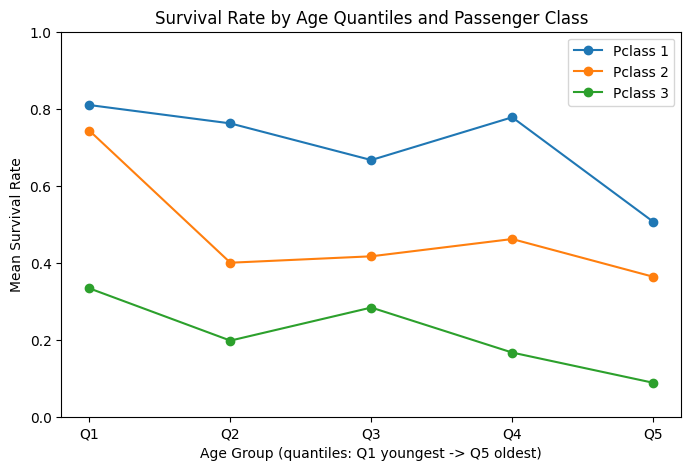

In [47]:
titanic = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Titanic-Dataset.csv")

t = titanic.dropna(subset=['Age']).copy()

t['AgeGroup'] = pd.qcut(t['Age'], q=5, labels=['Q1','Q2','Q3','Q4','Q5'])

pivot = t.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().unstack(level=1)
print("Mean survival by Pclass and AgeGroup:")
display(pivot)

plt.figure(figsize=(8,5))
for pclass in sorted(t['Pclass'].unique()):
    plt.plot(pivot.columns, pivot.loc[pclass], marker='o', label=f'Pclass {pclass}')
plt.xlabel('Age Group (quantiles: Q1 youngest to Q5 oldest)')
plt.ylabel('Mean Survival Rate')
plt.title('Survival Rate by Age Quantiles and Passenger Class')
plt.ylim(0,1)
plt.legend()
plt.show()